# Исследование об интернет-магазине компьютерных игр

Интернет-магазин занимается общемировой продажей компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования:** выявить закономерности, определяющие успешность игр, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

**Задачи исследования:** 

- определить пригодность исходных данных для дальнейшего анализа, провести предобработку данных;
- выявить актуальный период, за которых в дальнейшем будут анализироваться данные;
- оценить популярность платформ;
- проанализировать влияние на объем продажи игр таких характеристик игр как платформы, на которых они выходят, принадлежность к определенному жанру, оценки критиков и пользователей;
-  выявить наличие либо отсутствие региональных особенностей потребителей игр;
-  проверить гипотезы о наличии статистически значимой разницы в популярности игр на разных платформах и в разных жанрах. 

## Краткие выводы по результатам анализа

По результатам исследовательского анализа данных:

- График распределения выпуска игр по годам показал резкий роста производства игр в 1995 и 2002, пик в 2008-2009 и спад c выходом на плато в 2012-2016 годах. Исходы из этого на 2017 год можно прогнозировать стабильное развитие игровой индустрии.
- За последнее десятилетие выход на рынок новых поколений платформ происходит каждые 5-6 лет. Единственная платформа, которая показывает стабильный средний результат на протяжении многих лет – персональный компьютер (PC).
- Наиболее популярными и перспективными являются платформы PS (PS3, PS4), Xbox (X360, XOne), DS (3DS), Wii (WiiU).
- Для детального анализа был выбран период с 2012 по 2016 год.
- Оценки критиков и пользователей практически не влияют на продажи. 
- На продажи значительно влияет жанр игр. Самые популярные из расчета среднего значения одной игры – Shooter, Platform и Sports. По агрегированным данным, с учетом общего количества выходящих игр, самые популярные – Action, Shooter и Role-Playing. Наименее популярные при любом типе подсчета - Stategy, Puzzle и Adventure.
- Тренд популярности жанров выглядит аналогично в североамериканском и европейском регионах, в Японии же на первое место выходит Role-Playing, а в топ-5 попадает Platform.
- Североамериканский регион является лидером по количеству продаж, превосходя остальные регионы, взятые в сумме. В североамериканском и европейском регионах наиболее популярные платформы Xbox (X360) и Play Station (PS3, PS4), в Японии - платформа местного производства Nintendo (3DS). 
- В североамериканском регионе наиболее популярны игры с рейтингом M, наименее – с рейтингом T. Игры, произведенные в Японии и Европе, имеют существенно более низкие объемы продаж.

При планировании кампании на последующие годы необходимо ориентироваться на последние модели самых популярных платформ – Xbox One, PS4, 3DS, WiiU, при планировании маркетинговой компании не стоит делать упор на повышение оценок критиков и пользователей, однако определенно стоит учитывать региональные особенности рынков: на разных рынках популярны разные жанры и платформы. 

## Обзор данных

Импортируем необходимые для проведения анализа данных библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pylab as pl
import re
from scipy import stats as st
import json
from IPython.display import display, HTML

Прочитаем файл `games.csv` с данными (путь к данным храниться в файле формата json) и сохраним его в переменной `data`:

In [2]:
# Чтение JSON файла
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)
 
# Чтение CSV файла с использованием пути из JSON
dataset_path = config['dataset_path_games']
data = pd.read_csv(dataset_path)

Уберем ограничения при отображении количества столбцов, строк, ширины столбцов.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Выведем первые 10 строчек датафрейма `data` на экран.

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Во всех столбцах, кроме содержащих информацию об объемах продаж и платформе, на которой выходили игры, есть пропущенные значения, которые необходимо либо восстановить, либо определить возможность сохранения пропусков. В части столбцов тип данных не соответствует хранящимся в них значениям. Все эти недостатки исходного датафрейма будут устранены на этапе предобработки данных. 

## Предобработка данных

### Названия столбцов

In [6]:
# Заменим названия столбцов (приведем их к нижнему регистру)
data.columns = data.columns.str.lower()

### Удаление дубликатов

Проверим наличие явных дубликатов в датафрейме:

In [7]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

Также проверим, есть ли строки, которые идентичны по всему кроме значений продаж:

In [8]:
# Создадим промежуточный датафрейм со всеми колонками, кроме продаж:
df1 = data.loc[:, ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']]
# Посчитаем количество дубликатов в этом датафреме:
df1.duplicated().sum()

2

In [9]:
# Выведем строки-дубликаты из промежуточного датафрейма
df1.loc[df1.duplicated(keep=False)]

,name,platform,year_of_release,genre,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,83.0,5.5,E


In [10]:
# Теперь выведем эти же строки из основного датафрейма
data.loc[[604, 659, 14244, 16230]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Для строк 659 и 14244 отсутствует как наименование игры, так и ее жанр, нет никакой информации о рейтинге и оценках, информация относится к 1993 году, данные о количестве проданных копий относительно невелики, а восстановить данные о наименовании игр по остальным данным не представляется возможным. Также это единственные две строки, в которых отсутствуют значения для столбцов  `name` и `genre`. Поэтому эти две строки будут удалены из датафрейма и дальнейшего анализа:

In [11]:
data = data.loc[~data['name'].isna()]

Для дальнейшей обработки объединим значения строк, которые отличаются только данными по объемам продаж (604, 16230), в отдельный датафрейм:

In [12]:
# Объединим две искомые строки в промежуточный датафрейм df2
df2 = data.loc[[604, 16230]]
df2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [13]:
# Выбираем индексы нужных строк
index_1 = 604
index_2 = 16230

# Суммируем значения для выбранных строк
sum_row = df2.loc[index_1, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] +\
          df2.loc[index_2, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

# Обновляем значения в исходной строке
df2.loc[index_1, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = sum_row

# Выводим результат
df2.loc[index_1]

name               Madden NFL 13
platform                     PS3
year_of_release           2012.0
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                83.0
user_score                   5.5
rating                         E
Name: 604, dtype: object

In [14]:
# Заменяем в главном датафрейме строку на объединенные данные
data.loc[604] = df2.loc[index_1]

# Удаляем дублирующую строку, значение из которой мы взяли для суммы
data = data.drop(16230)

# Обновляем индексы датафрейма
data = data.reset_index(drop=True)

# Выведем обновленные строки для проверки
data.loc[[604, 16230]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E
16230,Geten no Hana: Yume Akari,PSP,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Из датафрейма были удалены строки, не содержащие интересующей информации, либо представляющие собой задвоенную информацию об одной игре.

### Обработка пропусков и изменение типов данных

На данном этапе исследования в столбцах `name`, `platform` и `genre` отсутствуют пропуски. Для дальнейшего удобства обработки данных изменим тип данных в данных столбцах с `object` на `str`:

In [15]:
data['name'] = data['name'].astype(str)

In [16]:
data['platform'] = data['platform'].astype(str)

In [17]:
data['genre'] = data['genre'].astype(str)

**Столбец year_of_release**

In [18]:
# Выведем первые несколько строк, в которых отсутствуют значения в столбце year_of_release
data.loc[data['year_of_release'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Как видно из выведенных строк, часто в наименовании игры содержится упоминание года. 

In [19]:
# Выведем первые 5 строк, в которых в названии игры есть упоминание года, начиная с 2000, 
# а год выпуска игры не указан
data.loc[(data['year_of_release'].isna()) &( data['name'].str.contains(' 20'))].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1649,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2491,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E


Если проанализировать выведенные игры, можно определить, что их год выпуска предшествует году, указанному в названии. Например, Madden NFL 2004	выпущена в 2003 году,  wwe Smackdown vs. Raw 2006 в 2005 и т. д.
Также обнаружены ошибки в указании названий игр, когда год пишется через дефис: 20-03.

In [20]:
# Устраним ошибки в написании года в названии игр путем замены 
data['name'] = data['name'].replace(to_replace='20-', value='20', regex=True).str.strip()

# Выведем первые 5 строк для проверки
data.loc[(data['year_of_release'].isna()) & (data['name'].str.contains(' 20'))].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1649,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2491,MLB SlugFest 2003,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E


Текущее количество пропусков в столбце `year_of_release`:

In [21]:
data.loc[data['year_of_release'].isna(), 'name'].count()

269

Теперь извлечем из столбца `name` информацию о годе и заполним ей пропуски в столбце `year_of_release`, уменьшая каждое значение года в наименовании на 1, для игр, выпущенных после 2000 года.

In [22]:
def extract_year(name):
    try:
        year_match = re.search(r'\b20(\d{2})\b', name)
        if year_match:
            return int('20' + year_match.group(1)) - 1
    except (ValueError, AttributeError):
        pass
    return None

data['year_of_release'] = data.apply(lambda row: extract_year(row['name'])
                                  if pd.isna(row['year_of_release']) and ' 20' in row['name']
                                  else row['year_of_release'], axis=1)


In [23]:
# Выведем несколько строк для проверки
data.loc[[183, 377, 475]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


После заполнения количество пропусков в столбце `year_of_release' составляет:

In [24]:
data.loc[data['year_of_release'].isna(), 'name'].count()

252

In [25]:
# Проверим наличие аналогичных строк для игр, выпущенных ранее 2000 года
data.loc[(data['year_of_release'].isna()) &( data['name'].str.contains(' 19'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Для игр, выпущенных в 1999 и ранее, аналогичных значений в наименовании не нашлось. Таким образом, при помощи извлечения года из наименования игры удалось заполнить 17 пропусков.
Оставшиеся пропуски составляют около 1,5% от общего объема данных, поэтому исключим их из дальнейшего исследования:

In [26]:
data = data[~data['year_of_release'].isna()]

Поскольку год - целое значение, изменим тип данных в столбце `year_of_release` на `int`:

In [27]:
data['year_of_release'] = data['year_of_release'].astype(int)

**Столбцы critic_score и user_score**

Относительно общего числа строк в датафрейме (16460), данные столбцы содержат около 50% и 60% информации соответственно, поэтому заполнение такого большого числа пропусков медианным значением привело бы к существенным искажениям. 

Проверим, есть ли в столбце `critic_score` оценка 0, поставленная критиками:

In [28]:
data.loc[data['critic_score'] < 0.01]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Поскольку нулевые значения, поставленные критиками, отсутствуют, для дальнейшего удобства обработки информации мы заменим пропущенные значения в столбце на 0:

In [29]:
data['critic_score'] = data['critic_score'].fillna(0)

В столбце `critic_score` все данные представляют собой целые значения, поэтому изменим тип данных в столбце с `float` на `int`:

In [30]:
data['critic_score'] = data['critic_score'].astype(int)

В столбце `user_score` помимо числовых значений есть строки - `tbd`, что расшифровывается как "to be determined" и означает, что данные значения должны были быть заполнены позднее. Посчитаем количество таких строк:

In [31]:
data.loc[data['user_score'] == 'tbd']['user_score'].count()

2378

Значение `tbd` содержится в 2378 строках столбца `user_score`. Поскольку к моменту проведения анализа данных эти строки не были заполнены числовыми значениями, заменим эти значения на 0:

In [32]:
data['user_score'] = data['user_score'].replace('tbd', 0)

А теперь проверим, что в столбце `user_score` нулевые значения имеют только строки, где ранее было значение `tbd`:

In [33]:
data['user_score'] = data['user_score'].astype(float).round(1)

In [34]:
data.loc[data['user_score'] < 0.01]['user_score'].count()

2379

Разница составила одно значение. С учетом общего объема датафрейма можно принебречь одной нулевой оценкой. 
Затем приведем тип данных в столбце в соответствие с его содержанием:

In [35]:
data['user_score'] = data['user_score'].astype(float).round(1)

**Столбец rating**

Рейтинг `ESRB (Entertainment Software Rating Board)` - это возрастной рейтинг компьютерных игр для пользователя, принятый в США и Канаде. Именно его оценки указаны в столбце `rating`. Для Европы существует свой рейтинг - `PEGI`, для Японии - `CERO`. Оба они имеют другие буквенные обозначения категорий игр. Поэтому заполнить пропуски значениями рейтинга не представляется возможным. 
Для удобства дальнейшей обработки данных заполним пропуски в столбце `rating` текстовыми значениями `None`:

In [36]:
data['rating'] = data['rating'].fillna('None')

### Дополнительная предобработка данных

Выведем список уникальных значений наименований игр в алфавитном порядке: 

In [37]:
unique_names = sorted(data['name'].unique())

unique_names_df = pd.DataFrame(unique_names, columns=['name'])
unique_names_df_st = f'''
<div style="max-height:200px; overflow:auto;">
    {unique_names_df.to_html(index=False)}
</div>
'''

display(HTML(unique_names_df_st))

name
'98 Koshien
.hack//G.U. Vol.1//Rebirth
.hack//G.U. Vol.2//Reminisce
.hack//G.U. Vol.2//Reminisce (jp sales)
.hack//G.U. Vol.3//Redemption
.hack//Infection Part 1
.hack//Link
.hack//Mutation Part 2
.hack//Outbreak Part 3
.hack//Quarantine Part 4: The Final Chapter


При беглом просмотре выводимых значений не отмечены случаи неявных дубликатов в наименованиях игр (в связи с их крайне большим количеством ручной поиск неявных дубликатов представляется крайне трудозатратным и плохо реализуемым и не предполагается к выполнению в рамках данного анализа данных).
Однако обращает на себя внимание тот факт, что во многих названиях игр указывается регион продаж. 
Выведем строки, содержащие в наименовании игр слово `sales`:

In [38]:
sales = data.loc[data['name'].str.contains('sales')]

sales_st = f'''
<div style="max-height:200px; overflow:auto;">
    {sales.to_html(index=False)}
</div>
'''

display(HTML(sales_st))

name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
Project Gotham Racing (JP weekly sales),XB,2002,Action,1.54,0.44,0.04,0.07,0,NaN,None
Medal of Honor: European Assault (All Region sales),PS2,2005,Shooter,0.89,0.69,0.09,0.21,0,NaN,None
NBA Live 06 (All region sales),PS2,2005,Sports,1.44,0.15,0.00,0.05,0,NaN,None
Tony Hawk's American Wasteland (Old all region sales),PS2,2005,Sports,0.80,0.63,0.01,0.19,0,NaN,None
Tony Hawk's American Wasteland (Weekly american sales),PS2,2005,Sports,1.38,0.05,0.00,0.02,0,NaN,None
NBA Live 06 (Weekly american sales),PS2,2005,Sports,1.35,0.05,0.00,0.02,0,NaN,None
Ratchet & Clank: Up Your Arsenal (Weekly american sales),PS2,2004,Platform,1.27,0.05,0.00,0.02,0,NaN,None
Midnight Club 3: DUB Edition (America weekly sales),PS2,2005,Racing,1.22,0.05,0.00,0.01,0,NaN,None
Tetris 2 (All region sales),GB,1992,Puzzle,0.56,0.22,0.43,0.03,0,NaN,None
World Soccer Winning Eleven 9 (JP & Others sales),PSP,2005,Sports,0.01,0.88,0.31,0.00,0,NaN,None


In [39]:
# Определим количество таких строк
data.loc[data['name'].str.contains('sales')]['name'].count()

142

В части случаев игры с одним и тем же наименованием и годом выпуска различаются по жанру, платформе или рейтингу. Однако есть случаи, когда различие между двумя строками заключается только в информации об объемах продаж, например, когда данные в одной строке указаны для японского рынка, а в другой - для прочих рынков. 

Стоит обратить внимание, что во всех строках, содержащих слово `sales`, отсутствуют данные об оценке критиков и пользователей.

In [40]:
# Выведем строку-пример
data.loc[data['name'].str.contains("Warriors Orochi 2")].head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4780,Warriors Orochi 2 (JP sales),PS2,2008,Action,0.00,0.0,0.40,0.00,0,NaN,None
6061,Warriors Orochi 2,PSP,2008,Action,0.06,0.0,0.22,0.01,56,7.5,T


Чтобы устранить данное дублирование перенесем значения в скобках, содержащие данные о рынках, в отдельный столбец датафрейма:

In [41]:
data['sales_area'] = data.loc[data['name'].str.contains('sales'), 'name'].str.extract(r'\((.*?)\)', expand=False)

Удалим из столбца `name` значения с скобках, содержащие слово `sales`:

In [42]:
df2 = data['name'].str.contains(r'\(.*sales.*\)', case=False, na=False)
data.loc[df2, 'name'] = data.loc[df2, 'name'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

Теперь, когда мы избавились от значений со словом `sales` в скобках в столбце `names`, объединим строки, отличающиеся только показателями продаж и оценками, просуммировав эти показатели:

In [43]:
data_gr = data.groupby(['name', 'platform', 'year_of_release', 'genre', 'rating']).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'critic_score': 'sum',
    'user_score': 'sum'
}).reset_index()

In [44]:
data_gr.head(5)

,name,platform,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,'98 Koshien,PS,1998,Sports,None,0.15,0.10,0.12,0.03,0,0.0
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,None,0.00,0.00,0.17,0.00,0,0.0
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,None,0.11,0.09,0.16,0.03,0,0.0
3,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,None,0.00,0.00,0.17,0.00,0,0.0
4,.hack//Infection Part 1,PS2,2002,Role-Playing,T,0.49,0.38,0.26,0.13,75,8.5


Теперь добавим столбец с суммарными продажами во всех регионах:

In [45]:
data_gr['total_sales'] = data_gr[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [46]:
# Выводим первые 5 строк датафрейма для проверки
data_gr.head(5)

,name,platform,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0,'98 Koshien,PS,1998,Sports,None,0.15,0.10,0.12,0.03,0,0.0,0.40
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,None,0.00,0.00,0.17,0.00,0,0.0,0.17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,None,0.11,0.09,0.16,0.03,0,0.0,0.39
3,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,None,0.00,0.00,0.17,0.00,0,0.0,0.17
4,.hack//Infection Part 1,PS2,2002,Role-Playing,T,0.49,0.38,0.26,0.13,75,8.5,1.26


В дополнение к ранее проведенной предобработке данных мы объединили строки, содержащие данные по разным регионам или периодам продаж для каждой игры, а также добавили столбец с информацией о суммарных продажах по всем регионам. 

**Вывод:** На данном этапе предобработки данных мы привели названия столбцов к нижнему регистру, проверили датафрейм на наличие явных и неявных дубликатов (явные отсутствуют, неявные - строки, которые различаются только значениями объемов продаж - были просуммированы). Также просуммированы строки, различающиеся информацией о регионах продаж.

Типы данных в столбцах `name`, `platform` и `genre` заменены на `str`, в столбцах `year_of_release`, `critic_score` на `int`, в столбце `user_score` на `float`. 

Для игр, в названии которых содержался год, пропуски в столбце `year_of_release` были заполнены этим значением минус единица, строки с остальными пропусками  в столбце `year_of_release` исключены из датафрейма. В столбцах `critic_score` и `user_score` пропуски были заменены на 0. В столбце `user_score` на 0 также было заменено значение `tbd`. В столбце `rating` пропуски были заполнены значениями `None`.

## Исследовательский анализ данных

### Распределение выпуска игр по годам

В первую очередь посмотрим, как распределялся выпуск игр по годам - построим график по данным столбца `year_of_release` (без учета отсутствующих значений):

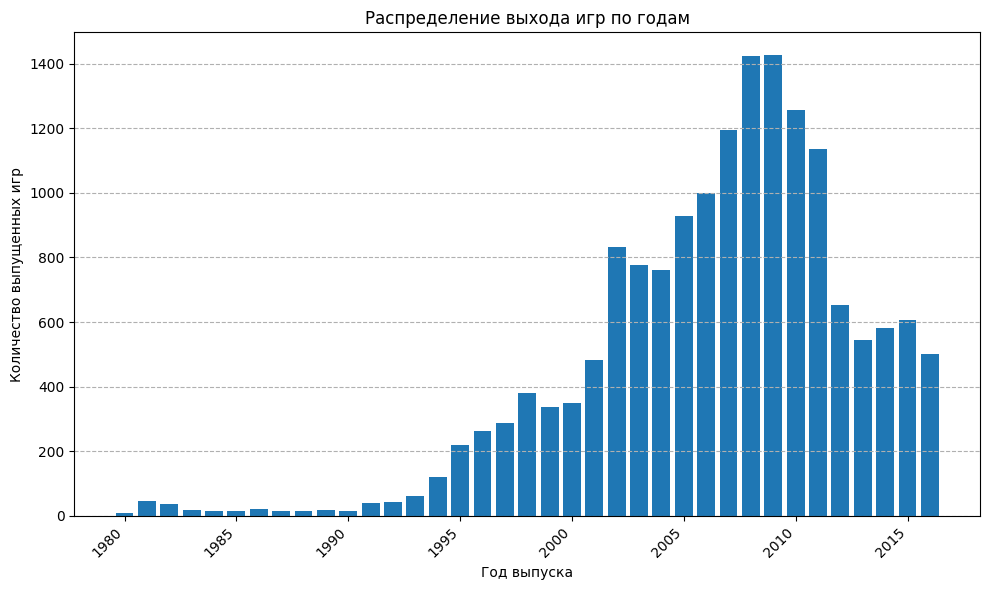

In [47]:
# Построим сводную таблицу со значениями количества вышедших игр по годам
pivot_table_release = data_gr.loc[data_gr['year_of_release'] > 0].pivot_table(index='year_of_release', 
                                                                              values='name', 
                                                                              aggfunc='count')
pivot_table_release = pivot_table_release.reset_index()
pivot_table_release.columns = ['year_of_release', 'quantity']

# Построим график распределения выхода игр по годам
plt.figure(figsize=(10, 6))
plt.bar(pivot_table_release['year_of_release'], pivot_table_release['quantity'])
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение выхода игр по годам')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Из графика видно, что игровая индустрия пережила первый резкий рост объема производимых игр около 1995 года, около 2002 года показатель практически удвоился, пик производства приходится на 2008-2009 годы, после чего в 2012 наступает резкий спад, период с 2012 по 2016 можно охарактеризовать как плато. 

### Распределение объемов продаж на разных платформах по годам

Теперь посмотрим, как по годам менялся показатель общего объема продаж в зависимости от платформы, на которой выходила игра. 

In [48]:
# Построим сводную таблицу распределения объемов продаж по годам в зависимости от платформы
platfom_sales = data_gr.pivot_table(values='total_sales', 
                                    index='platform', 
                                    columns='year_of_release', 
                                    aggfunc='sum', 
                                    fill_value=0)

# Сгруппируем данные по общему объему продаж для каждой платформы:
total_sales_by_platform = data_gr.groupby('platform')['total_sales'].sum().sort_values(ascending=True).to_frame()
total_sales_by_platform

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


In [49]:
# Отсортируем платформы с общим объемом продаж свыше 50 млн. копий.
max_sale_platforms = total_sales_by_platform.loc[total_sales_by_platform['total_sales'] > 50]

# Отфильтруем строки в сводной таблице по платформам, оставив только платформы с объемом продаж свыше 50 млн.
filtered_platform_sales = platfom_sales.loc[max_sale_platforms.index].sort_index()
filtered_platform_sales

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.95,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,4.89,5.57,25.49,0.00,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.34,52.11,50.61,28.82,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.10,39.50,49.24,57.87,33.97,3.25,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NES,0.00,0.00,0.00,10.96,50.08,53.44,36.41,19.76,45.01,7.85,15.73,6.11,1.98,3.61,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.03,0.00,0.00,0.00,3.03,0.00,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25


Визуализируем полученные данные при помощи теплового графика:

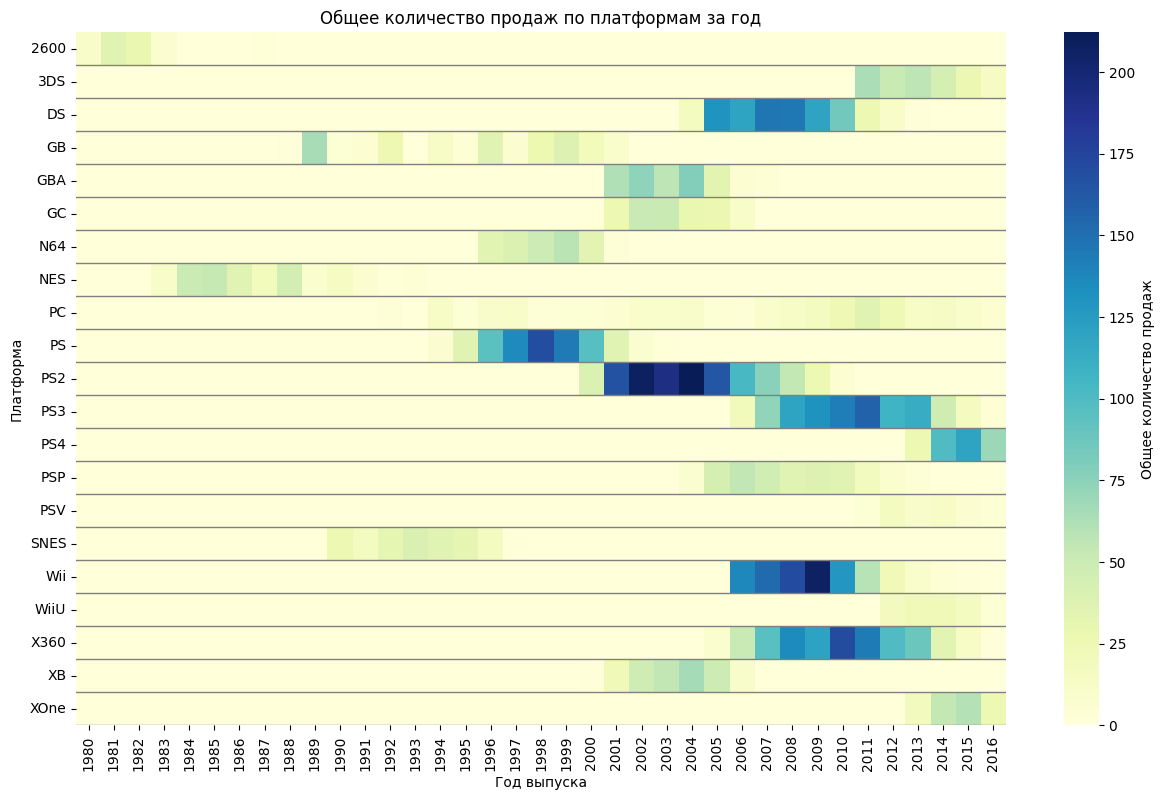

In [50]:
plt.figure(figsize=(15, 9))
seaborn.heatmap(filtered_platform_sales, 
                annot=False, 
                cmap='YlGnBu', 
                fmt='g', 
                cbar_kws={'label': 'Общее количество продаж'})
plt.title('Общее количество продаж по платформам за год')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
for i in range(len(filtered_platform_sales)):
    plt.axhline(i + 1, color='grey', linewidth=1)
plt.show()

Из анализа диаграммы выше видно, как одни популярные платформы планомерно заменяются другими. Например, в 80-е и 90-е годы большую популярность имела платформа Nintendo: на протяжении первого десятилетия наибольшую популярность имела ее первая версия - NES, во втором десятилетии она сменилась на SNES. Также на графике есть более поздние версии Nintendo: DS и 3DS.

Наиболее наглядно смену поколений игровых платформ можно увидеть на примере PS: приблизительно каждые 5-6 лет выходит новое поколение консоли, которое набирает большую популярность (PS, PS2, PS3, PS4), параллельно с этим у компании выходят альтернативные варианты платформ (`PSP`, `PSV`), которые, однако, не снискали такой популярности, как обновленная версия основной консоли.

Таким образом, средний срок смены поколений платформ составлял порядка 5-6 лет.

Наиболее популярные за последнее время платформы: PS (PS, PS2, PS3, PS4, PSP, PSV), XBox (XB, X360, XOne), DS (DS, 3DS), Wii (Wii, WiiU). При этом на протяжении 20 лет стабильную позицию удерживают игры для стационарного персонального компьютера (PC), которые за все это время не выбивались в лидеры по объему продаж, однако никогда полностью не теряли своей актуальности, как игры для определенных моделей консолей. 

### Выбор актуального периода для анализа

В целом, по результатам анализа двух графиков, можно сказать, что актуальный период, за который в дальнейшем имеет смысл анализировать данные, составляет от 2012 до 2016 года: во первых, с этого времени происходит смена поколения на последнее для основных платформ XB, PS, DS и Wii; во вторых, именно этот период отличается по своим объемам продаж - ровное плато после резкого падения.  

In [51]:
# Оставим в анализируемом датафрейме только данные об играх начиная с 2012 года выпуска
data_gr_2012 = data_gr.loc[data_gr['year_of_release'] >= 2012]

### Визуализация популярности платформ при помощи диаграммы размаха

Теперь построим диаграмму размаха с разбивкой по платформам, ограничив количество отражаемых выбросов - сверхпопулярных игр, имеющих колоссальные объемы продаж:

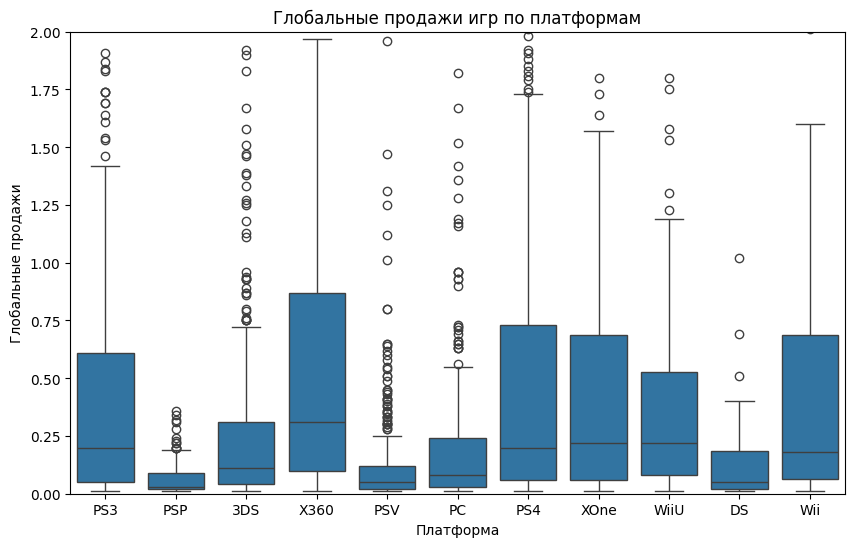

In [52]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(x='platform', y='total_sales', data=data_gr_2012)
plt.ylim(0, 2)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

По результатам анализа диаграммы можно сделать вывод о наличии на рынке трех однозначно лидирующих платформ: XBox с последними моделями X360 (лидер рынка) и XOne, Play Station (PS) с их двумя последними моделями PS4 и PS3 и wiiU (Wii и WiiU). У PS последняя модель уже обогнала предыдущую по числу продаж, для XB и Wii процесс набора популярности последних моделей еще идет. 

### Влияние отзывов критиков и пользователей на продажи

Проверим наличие корреляции между отзывами пользователей и критиков и объемами продаж. Возьмем платформу X360 - лидирующую на рынке по числу продаж, и сравним корреляцию между оценками и продажами для нее и всех платформ за актуальный период.

#### Оценки критиков

Отфильтруем данные, удалив из датафрейма нулевые значения оценок критиков, и построим совмещенную диаграмму рассеивания для платформы X360 и всех платформ:

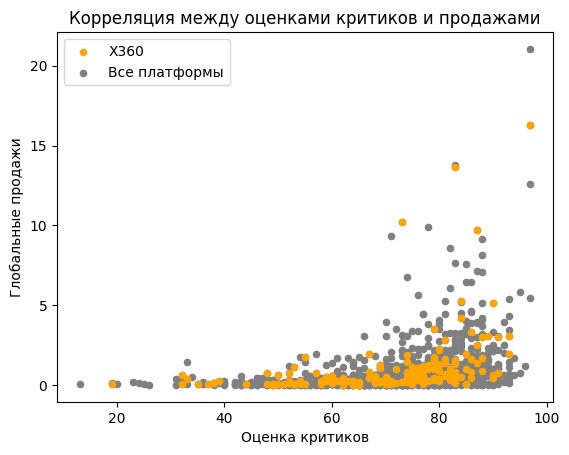


Коэффициент корреляции для X360: 0.3606
Коэффициент корреляции для всех платформ: 0.3086


In [53]:
# Построим диаграмму рассеивания для X360
filtered_data = data_gr_2012[(data_gr_2012['critic_score'] != 0) & (data_gr_2012['platform'] == 'X360')]
ax = filtered_data.plot(x='critic_score', 
                        y='total_sales', 
                        kind='scatter', 
                        c='orange', 
                        label='X360', 
                        zorder=2)

# Построим диаграмму рассеивания для всех платформ
filtered_data2 = data_gr_2012[data_gr_2012['critic_score'] != 0]
bx = filtered_data2.plot(ax=ax, 
                         x='critic_score', 
                         y='total_sales', 
                         kind='scatter', 
                         c='grey', 
                         label='Все платформы', 
                         zorder=1)

bx.set_xlabel('Оценка критиков')
bx.set_ylabel('Глобальные продажи')
bx.set_title('Корреляция между оценками критиков и продажами')

ax.legend()
plt.show();    

# Выведим коэффициенты корреляции
print()
print('Коэффициент корреляции для X360:', 
      filtered_data['critic_score'].corr(filtered_data['total_sales']).round(4))
print('Коэффициент корреляции для всех платформ:', 
      filtered_data2['critic_score'].corr(filtered_data2['total_sales']).round(4))

В целом корреляция оценок критиков и продаж не выражена как для отдельной платформы, так и для совокупности всех платформ. Значение корреляции крайне низко - не выше 0,36, а график представляет собой практически ровную горизонтальную линию. Очень слабую положительную корреляцию можно отметить только на отрезке оценки критиков в 60-85 баллов. 

#### Оценки пользователей

Аналогично оценкам критиков построим диаграммы рассеивания по соотношению оценок пользователей и продаж для X360 и все платформ (без учета нулевых значений пользовательских оценок).

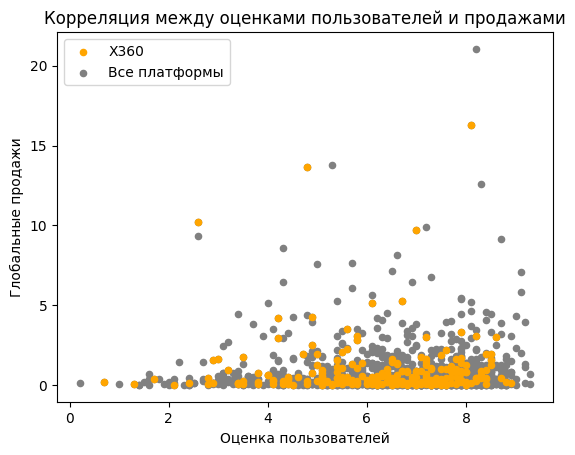


Коэффициент корреляции для X360: 0.0062
Коэффициент корреляции для всех платформ: 0.0042


In [54]:
# Построим диаграмму рассеивания для X360
filtered_data = data_gr_2012[(data_gr_2012['user_score'] != 0) & (data_gr_2012['platform'] == 'X360')]
ax = filtered_data.plot(x='user_score', 
                        y='total_sales', 
                        kind='scatter', 
                        c='orange', 
                        label='X360', 
                        zorder=2)

# Построим диаграмму рассеивания для всех платформ
filtered_data2 = data_gr_2012[data_gr_2012['user_score'] != 0]
bx = filtered_data2.plot(ax=ax, 
                         x='user_score', 
                         y='total_sales', 
                         kind='scatter', 
                         c='grey', 
                         label='Все платформы', 
                         zorder=1)
bx.set_xlabel('Оценка пользователей')
bx.set_ylabel('Глобальные продажи')
bx.set_title('Корреляция между оценками пользователей и продажами')

ax.legend()
plt.show()    

# Выведим коэффициенты корреляции
print()
print('Коэффициент корреляции для X360:', 
      filtered_data['user_score'].corr(filtered_data['total_sales']).round(4))
print('Коэффициент корреляции для всех платформ:', 
      filtered_data2['user_score'].corr(filtered_data2['total_sales']).round(4))

Корреляция между оценками пользователей и продажами практически стремится к нулю для обеих платформ.

В целом можно сказать, что прямой связи между объемом продаж игр на разных платформах и оценками как критиков, так и пользователей практически нет. 

### Уровень продаж и жанры игр

Посмотрим на общее распределение игр по жанрам. Для этого построим сводную таблицу с распределением глобальных продаж в зависимости от жанра, а затем визуализируем полученную информацию:

           genre  total_sales_sum  total_sales_count  average_sales
0         Action           441.12               1031       0.427856
1        Shooter           304.73                235       1.296723
2   Role-Playing           192.80                370       0.521081
3         Sports           181.07                267       0.678165
4           Misc            85.04                192       0.442917
5       Platform            61.00                 85       0.717647
6         Racing            53.50                115       0.465217
7       Fighting            44.49                109       0.408165
8     Simulation            35.12                 80       0.439000
9      Adventure            29.43                302       0.097450
10      Strategy            13.34                 71       0.187887
11        Puzzle             4.89                 28       0.174643


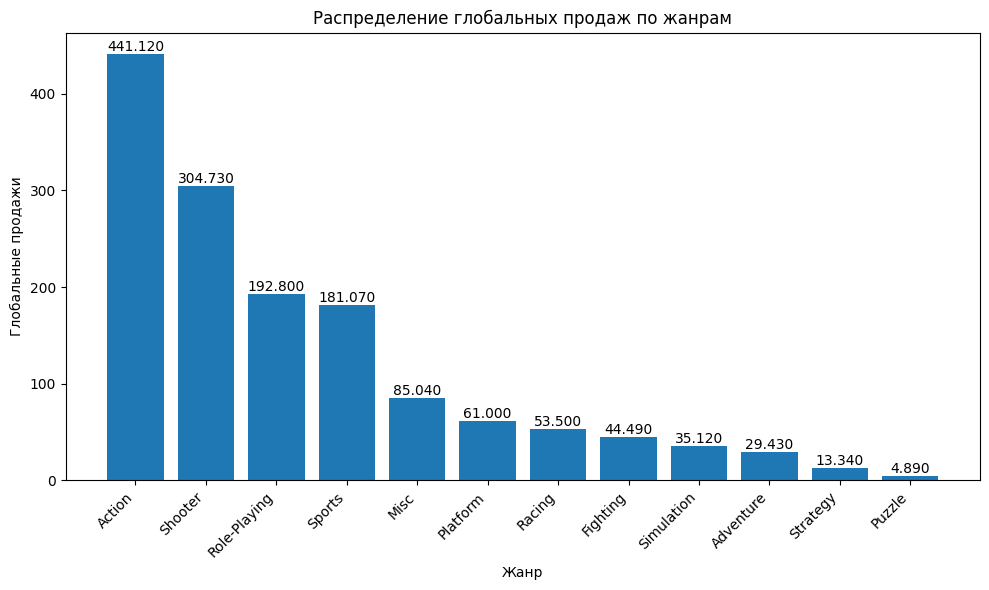

In [55]:
# Построим сводную таблицу с суммой и числом продаж игр по жанрам
pivot_table_genre = data_gr_2012.pivot_table(index='genre', 
                                             values='total_sales', 
                                             aggfunc=['sum', 'count'])

pivot_table_genre = pivot_table_genre.sort_values(by=('sum', 'total_sales'), ascending=False).reset_index()
pivot_table_genre.columns = ['genre', 'total_sales_sum', 'total_sales_count']
pivot_table_genre['average_sales'] = pivot_table_genre['total_sales_sum'] / pivot_table_genre['total_sales_count'] 
print(pivot_table_genre)

# Построим график для глобальных продаж по жанрам
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_table_genre['genre'], pivot_table_genre['total_sales_sum'])
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.title('Распределение глобальных продаж по жанрам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Отображаем значения столбцов
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, 
             height, 
             f'{height:.3f}', 
             ha='center', 
             va='bottom')
    
plt.show()

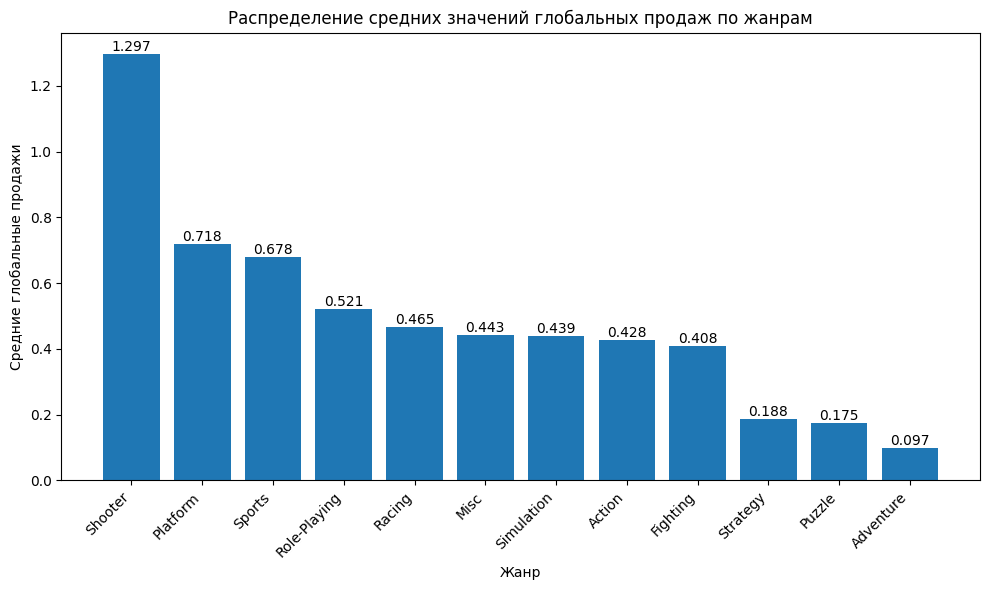

In [56]:
# Пересортируем сводную таблицу по значению столбца average_sales
pivot_table_genre = pivot_table_genre.sort_values(by='average_sales', ascending=False)

# Построим график для средних значений глобальных продаж по жанрам
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_table_genre['genre'], pivot_table_genre['average_sales'])
plt.xlabel('Жанр')
plt.ylabel('Средние глобальные продажи')
plt.title('Распределение средних значений глобальных продаж по жанрам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Отображаем значения столбцов
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, 
             height, 
             f'{height:.3f}', 
             ha='center', 
             va='bottom')
    
plt.show()

Если смотреть на агрегированные данные, однозначный лидер по прибыльности среди жанров - Action. Также крайне прибыльны жанры Shooter и Role_Playing. Напротив, наименьшее число продаж у игр в жанрах Puzzle, Stategy и Adventure.

Однако важно понимать, что превосходящее значение продаж игр жанра Action обусловлено, в том числе, количеством игр этого жанра. Если же смотреть на средние значения продаж, то лидерами окажутся жанры Shooter, Platform и Sports (наименьшие продажи все так же у Adventure, Stategy  и Puzzle, хотя они расположились в другом порядке). 

**Вывод:** В целом, график распределения выпуска игр по годам показал резкий роста производства игр в 1995 и 2002, пик в 2008-2009 и спад в 2012 году, период с 2012 по 2016 можно охарактеризовать как плато.

За последнее десятилетие выход на рынок новых поколений платформ происходит каждые 5-6 лет. Единственная платформа, которая показывает стабильный средний результат на протяжении многих лет – персональный компьютер (PC).

Одновременно наиболее популярными и перспективными являются платформы PS (PS, PS2, PS3, PS4, PSP, PSV), XBox(XB, X360, XOne), чуть менее популярными, но также перспективными Wii (Wii, WiiU) и DS (DS, 3DS).

Для детального анализа был выбран период с 2012 по 2016 год.

Оценки как критиков, так и пользователей практически не влияют на продажи. 
При этом на продажи значительно влияет жанр игр. Самые популярные из расчета среднего значения одной игры – Shooter, Platform и Sports. По агрегированным данным, с учетом количества выходящих игр, самые популярные – Action, Shooter и Role-Playing. Наименее популярные при любом типе подсчета - Stategy, Puzzle и Adventure.

## Составление портрета пользователя каждого региона

### Платформы

В первую очередь определим топ-5 самых популярных платформ для каждого из регионов продаж (NA, EU, JP): 

Общий объем продаж в регионе NA: 590.97
Топ-5 платформ в регионе NA:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Общий объем продаж в регионе EU: 506.82
Топ-5 платформ в регионе EU:
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Общий объем продаж в регионе JP: 192.58
Топ-5 платформ в регионе JP:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64



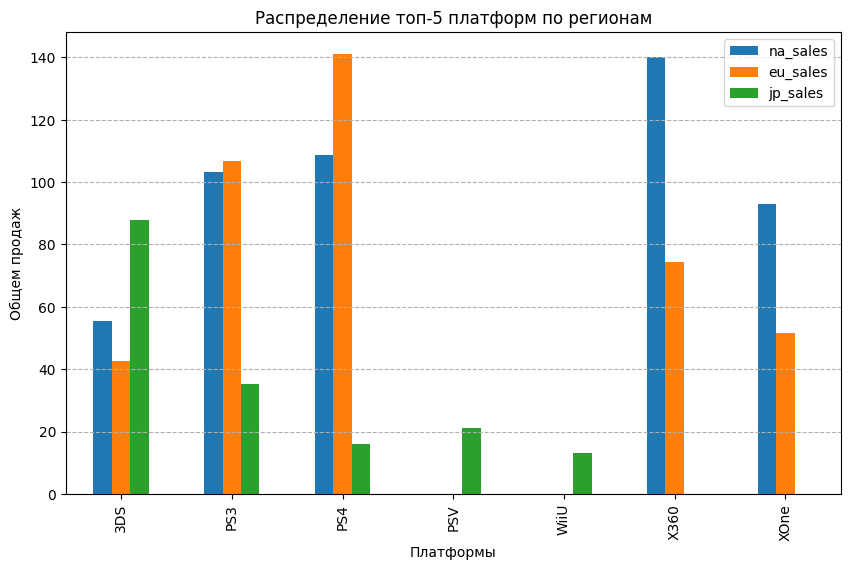

In [57]:
# Построим сводную таблицу с данными об объемах продаж по платформам и по регионам
pivot_table_platform = data_gr_2012.pivot_table(index=['platform'], 
                                                values=['na_sales', 'eu_sales', 'jp_sales'], 
                                                aggfunc='sum')

# Выведем данные об общем объеме продаж и топовых платформах для трех регионов
regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = ['NA', 'EU', 'JP']

for region, name in zip(regions, region_names):
    total_sales = pivot_table_platform[region].sum().round(2)
    top_platforms = pivot_table_platform[region].sort_values(ascending=False).head(5)
    print(f'Общий объем продаж в регионе {name}: {total_sales}')
    print(f'Топ-5 платформ в регионе {name}:')
    print(top_platforms)
    print()
    
# Сформируем общую таблицу со значениями топ-5 платформ для каждого из регионов
na_sales = pivot_table_platform['na_sales'].sort_values(ascending=False).head(5).to_frame()
eu_sales = pivot_table_platform['eu_sales'].sort_values(ascending=False).head(5).to_frame()
jp_sales = pivot_table_platform['jp_sales'].sort_values(ascending=False).head(5).to_frame()
result_sales = pd.merge(na_sales, eu_sales, left_index=True, right_index=True, how='outer')
result_sales = pd.merge(result_sales, jp_sales, left_index=True, right_index=True, how='outer')
result_sales.columns = ['na_sales', 'eu_sales', 'jp_sales']

# Построим групповую столбчатую диаграмму
cx = result_sales.plot(kind='bar', stacked=False, figsize=(10, 6))
cx.set_ylabel('Общем продаж')
cx.set_xlabel('Платформы')
cx.set_title('Распределение топ-5 платформ по регионам')
cx.grid(axis='y', linestyle='--')

plt.show()

Североамериканский рынок является самым крупным среди трех региональных рынков, при этом на нем со значительным отрывом лидирует платформа X360, практически на одном уровне продаже PS4 и PS3. Наименее популярная, но все же вошедшая в топ-5 платформа, - 3DS.

Европейский рынок составляет около 85% североамериканского. Список 5 самых популярных платформ здесь такой же, однако распределение по местам отличается для платформ. Наиболее популярна платформа PS4, X360 расположилась на 3 месте. 

Японский рынок составляет всего 33% от североамериканского и по сравнению с двум другими отличается своей специфичностью. Здесь наибольшее число продаж приносит платформа 3DS (производимая в Японии Nintendo), которая занимает на других рынках последнее место в топ-5. На японском рынке также популярны PS3, PSV и PS4, в топ также входит WiiU, разрабатываемая Nintendo, а X360 не представлена вообще. 

### Жанры

Теперь определим топ-5 самых популярных жанров для каждого из регионов продаж (NA, EU, JP): 

Общий объем продаж в регионе NA: 590.97
Топ-5 жанров в регионе NA:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Общий объем продаж в регионе EU: 506.82
Топ-5 жанров в регионе EU:
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Общий объем продаж в регионе JP: 192.58
Топ-5 жанров в регионе JP:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64



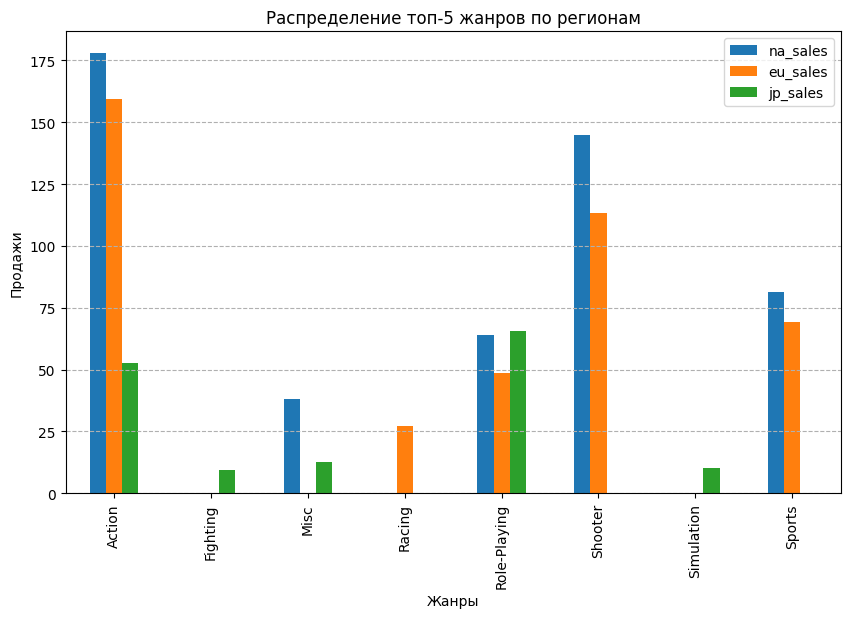

In [58]:
# Построим сводную таблицу с данными об объемах продаж по жанрам и по регионам
pivot_table_genre = data_gr_2012.pivot_table(index=['genre'], 
                                             values=['na_sales', 'eu_sales', 'jp_sales'], 
                                             aggfunc='sum')

# Выведем данные об общем объеме продаж и топовых жанрах для трех регионов
regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = ['NA', 'EU', 'JP']

for region, name in zip(regions, region_names):
    total_sales = pivot_table_genre[region].sum().round(2)
    top_genres = pivot_table_genre[region].sort_values(ascending=False).head(5)
    print(f'Общий объем продаж в регионе {name}: {total_sales}')
    print(f'Топ-5 жанров в регионе {name}:')
    print(top_genres)
    print()

# Сформируем общую таблицу со значениями топ-5 платформ для каждого из регионов
na_sales_g = pivot_table_genre['na_sales'].sort_values(ascending=False).head(5).to_frame()
eu_sales_g = pivot_table_genre['eu_sales'].sort_values(ascending=False).head(5).to_frame()
jp_sales_g = pivot_table_genre['jp_sales'].sort_values(ascending=False).head(5).to_frame()
result_sales_g = pd.merge(na_sales_g, eu_sales_g, left_index=True, right_index=True, how='outer')
result_sales_g = pd.merge(result_sales_g, jp_sales_g, left_index=True, right_index=True, how='outer')
result_sales_g.columns = ['na_sales', 'eu_sales', 'jp_sales']

# Построим групповую столбчатую диаграмму
dx = result_sales_g.plot(kind='bar', stacked=False, figsize=(10, 6))
dx.set_ylabel('Продажи')
dx.set_xlabel('Жанры')
dx.set_title('Распределение топ-5 жанров по регионам')
dx.grid(axis='y', linestyle='--')

plt.show()

Значения общего объема продаж по каждому региону не изменились, однако по распределению по жанрам регионы также имеют свою специфику. 

В североамериканском регионе наиболее популярны жанры Action, Shooter и Sports, первые два из которых соответствуют данным по глобальному рынку. Жанр Role_Playing занимает 4 место. 

На европеском рынке в топ-3 те же самые жанры, однако вместо Misc, популярного на североамериканском рынке, на 5 месте здесь появляется жанр Racing, который не популярен на остальных рынках. 

На японском рынке лидирует жанр Role-Playing, представлены жанры Action и Misc, характерные для других рынков, а в дополнение к ним появляются жанры Simulation и Fighting.

### Рейтинг

Наконец, определим, влияет ли рейтинг ESRB (Entertainment Software Rating Board) - ассоциации, определяющей возрастной рейтинг компьютерных игр для пользователя - на продажи в регионе NA:

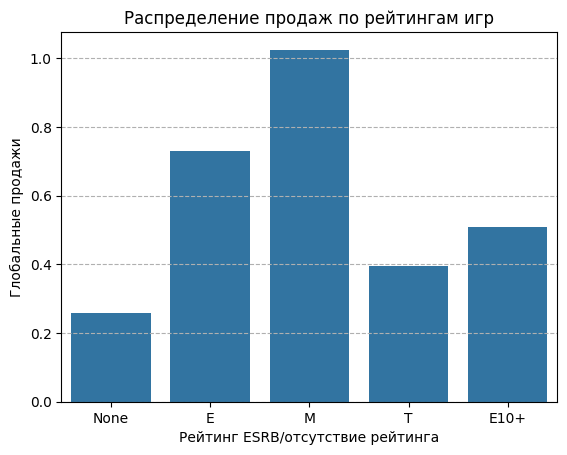

In [59]:
seaborn.barplot(x=data_gr_2012['rating'], y=data_gr_2012['total_sales'], errorbar=None)
plt.title('Распределение продаж по рейтингам игр')
plt.xlabel('Рейтинг ESRB/отсутствие рейтинга')
plt.ylabel('Глобальные продажи')
plt.grid(axis='y', linestyle='--')
plt.show()

Исходя из графика можно однозначно дать положительный ответ на вопрос о влиянии рейтинга игр на уровень продаж в североамериканском регионе. Для этого рынка лидирующими являются игры с категорией M (17+), наименее популярны - игры категории T (13+). 

При этом стоит отметить, что игры без указания категории, то есть произведенные в Европе и Японии, составляя почти 45% от общего объема производимых игр, имеют относительно низкие продажи. 

**Вывод:** По результатам исследования региональных особенностей рынка можно сделать вывод о том, что тенденции, характерные для североамериканского рынка, как самого крупного из трех, одновременно отражают и задают глобальные тренды. Европейский рынок также соответствует глобальным трендам, имея при этом, свои особенности. Японский же рынок имеет ярко выраженную региональную специфичность в исследованных аспектах: популярности платформ и жанров. 
Рейтинг игр определенно влияет на ее продажи в регионе NA. А игры, произведенные в Европе и Японии, значительно менее популярны: при том, что объем их производства составляет около 45%, совокупный объем продаж значительно ниже этих цифр. 

## Проверка гипотез

### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сначала выведем среднее значение пользовательских рейтингов для игр на платформе Xbox One (XOne):

In [60]:
average_user_rating_XOne = data_gr_2012.loc[(data_gr_2012['platform'] == 'XOne') & \
                           (data_gr_2012['user_score'] != 0), 'user_score'].mean()
average_user_rating_XOne.round(2)

6.52

Теперь выведим аналогичную информацию для игр, выходящих на персональных компьютерах - платформе PC:

In [61]:
average_user_rating_PC = data_gr_2012.loc[(data_gr_2012['platform'] == 'PC') & \
                        (data_gr_2012['user_score'] != 0), 'user_score'].mean()
average_user_rating_PC.round(2)

6.43

Дополнительно проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам путем метода scipy.stats.ttest_ind.

**Нулевая гипотеза:** Средние пользовательские рейтинги игр на платформах Xbox One и PC одинаковые.

**Алтернативня гипотеза:** Средние пользовательские рейтинги игр на платформах Xbox One и PC не одинаковые.

В качестве уровня статистической значимости выберем наиболее широко распространенное в научных исследованиях значение 0.05 (5%).

In [62]:
sample_1 = data_gr_2012.loc[(data_gr_2012['platform'] == 'XOne') & (data_gr_2012['user_score'] != 0), 'user_score']
sample_2 = data_gr_2012.loc[(data_gr_2012['platform'] == 'PC') & (data_gr_2012['user_score'] != 0), 'user_score']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(sample_1, sample_2)

print()
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу


Метод scipy.stats.ttest_ind не подтвердил возможность отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов для платформ Xbox One и PC.

### Гипотеза 2: средние пользовательские рейтинги жанров Action (экшен-игры) и Sports («спортивные соревнования») разные.

Сначала выведем среднее значение пользовательских рейтингов для игр жанра Action:

In [63]:
average_user_rating_Action = data_gr_2012.loc[(data_gr_2012['genre'] == 'Action') & \
                             (data_gr_2012['user_score'] != 0), 'user_score'].mean()
average_user_rating_Action.round(2)

6.83

Теперь выведем аналогичную информацию для игр жанра Sports:

In [64]:
average_user_rating_Sports = data_gr_2012.loc[(data_gr_2012['genre'] == 'Sports') & \
                             (data_gr_2012['user_score'] != 0), 'user_score'].mean()
average_user_rating_Sports.round(2)

5.46

Здесь также дополнительно проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам путем метода scipy.stats.ttest_ind.

**Нулевая гипотеза:** Средние пользовательские рейтинги игр в жанре Action и Sports одинаковые.

**Алтернативня гипотеза:** Средние пользовательские рейтинги игр в жанре Action и Sports не одинаковые.

В качестве уровня статистической значимости выберем наиболее широко распространенное в научных исследованиях значение 0.05 (5%).

In [65]:
sample_1 = data_gr_2012.loc[(data_gr_2012['genre'] == 'Action') & (data_gr_2012['user_score'] != 0), 'user_score']
sample_2 = data_gr_2012.loc[(data_gr_2012['genre'] == 'Sports') & (data_gr_2012['user_score'] != 0), 'user_score']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(sample_1, sample_2)

print()
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 4.804523380462848e-26
Отвергаем нулевую гипотезу


На этот раз метод scipy.stats.ttest_ind подтвердил, что нулевая гипотеза о равенстве средних пользовательских рейтингов для платформ Xbox One и PC может быть отвергнута, что соответствует расчету средних значений. 

**Вывод:** Средние пользовательские рейтинги для платформ XBox One и PC сопоставимы между собой, в то время как средние пользовательские рейтинги игр в жанрах Action и Sports не могут быть приравнены друг к другу. 

## Общий вывод

Изначальный датафрейм содержал пропущенные значения. В части столбцов тип данных не соответствовал хранящимся в них значениям. 

На этапе предобработки данных:
- названия столбцов были приведены к нижнему регистру;
- неявные дубликаты (различающиеся только объемом продаж) были просуммированы;
- произведена замена типов данных на `str` в столбцах `name`, `platform` и `genre`, на `int` в `year_of_release`, `critic_score`, на `float` в `user_score`;
- пропуски: нулевыми значениями заполнены пропуски в столбцах `critic_score`, `user_score`, удалены в столбцах `name` и `genre`, частично восстановлены из названий игр в `year_of_release`, заменены на `None` в столбце `rating`.

График распределения выпуска игр по годам показал резкий роста производства игр в 1995 и 2002, пик в 2008-2009 и спад c выходом на плато в 2012-2016 годах. Исходя из этого на 2017 год можно прогнозировать стабильное развитие игровой индустрии.

За последнее десятилетие выход на рынок новых поколений платформ происходит каждые 5-6 лет. Единственная платформа, которая показывает стабильный средний результат на протяжении многих лет – персональный компьютер (PC).

Одновременно наиболее популярными и перспективными являются платформы PS (PS3, PS4), Xbox (X360, XOne), чуть менее популярными, но также перспективными DS (3DS), Wii (WiiU).

Для детального анализа был выбран период с 2012 по 2016 год.

По результатам анализа было определено, что на продажи мало влияют как оценки критиков, так и пользователей. 

При этом на продажи значительно влияет жанр игр. Самые популярные из расчета среднего значения одной игры – Shooter, Platform и Sports. По агрегированным данным, с учетом количества выходящих игр, самые популярные – Action, Shooter и Role-Playing. Наименее популярные при любом типе подсчета - Stategy, Puzzle и Adventure.

Тренд на популярность жанров выглядит аналогично в североамериканском и европейском регионах, в Японии же на первое место выходит Role-Playing, а в топ-5 попадает Platform.

Североамериканский регион является лидером по количеству продаж, превосходя остальные регионы, взятые в сумме. В североамериканском и европейском регионах наиболее популярные платформы Xbox (X360) и Play Station (PS3, PS4). В Японии на первое место выходит платформа местного производства Nintendo (3DS). 

В североамериканском регионе наиболее популярны игры с рейтингом M, наименее – с рейтингом T. При этом та же диаграмма показала, что игры, произведенные в Японии и Европе, имеют существенно более низкие объемы продаж.

Средние пользовательские рейтинги для платформ XBox One и PC сопоставимы между собой, в то время как средние пользовательские рейтинги игр в жанрах Action и Sports не могут быть приравнены друг к другу.

Таким образом, при планировании кампании на последующие годы необходимо ориентироваться на последние модели самых популярных платформ – Xbox One, PS4, 3DS, WiiU, при планировании маркетинговой компании не стоит делать упор на повышение оценок критиков и пользователей, однако определенно стоит учитывать региональные особенности рынков: на разных рынках популярны разные жанры и платформы. 